In [1]:
from PIL import Image
import os
import sys
import numpy as np
import json

Image

In [2]:
directory = os.path.dirname("C:/Users/morit/OneDrive/UNI/Master/WS22/APP-RAS/Programming/myfolder/sample_trainingsdata/")
directory

'C:/Users/morit/OneDrive/UNI/Master/WS22/APP-RAS/Programming/myfolder/sample_trainingsdata'

In [3]:
filename = directory+'/rgb/0000.png'
filename

'C:/Users/morit/OneDrive/UNI/Master/WS22/APP-RAS/Programming/myfolder/sample_trainingsdata/rgb/0000.png'

In [4]:
filename = os.path.abspath(os.path.realpath(filename))
filename

'C:\\Users\\morit\\OneDrive\\UNI\\Master\\WS22\\APP-RAS\\Programming\\myfolder\\sample_trainingsdata\\rgb\\0000.png'

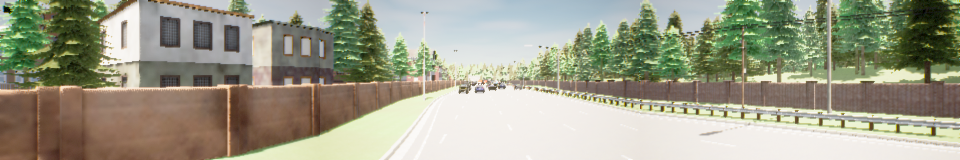

In [5]:
image = Image.open(filename)
image

In [6]:
np.shape(image)

(160, 960, 3)

In [7]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [8]:
np.asarray(image).flatten()

array([186, 190, 196, ..., 234, 229, 222], dtype=uint8)

VehicleControl

In [9]:
filename = directory+'/measurements/0000.json'
filename

'C:/Users/morit/OneDrive/UNI/Master/WS22/APP-RAS/Programming/myfolder/sample_trainingsdata/measurements/0000.json'

In [10]:
with open(filename, 'r') as f:
  measurements = json.load(f)

measurements

#person_string = '{"name": "Bob", "languages": "English", "numbers": [2, 1.6, null]}'

#person_dict = json.loads(person_string)

{'x': -41.84098069006417,
 'y': 282.35079994538586,
 'theta': 1.5703095197677612,
 'speed': 0.0,
 'target_speed': 4.0,
 'x_command': -45.316798836658776,
 'y_command': 332.3525395154904,
 'command': 4,
 'waypoints': [[-41.85740661621094, 282.3946533203125, 1.5830951615308566],
  [-41.92013931274414, 282.53436279296875, 1.6242934032685148],
  [-42.03871536254883, 282.7643737792969, 1.6939042188785232],
  [-42.231746673583984, 283.07330322265625, 1.7919276135623683],
  [-42.51945114135742, 283.4447937011719, 1.9151731161729464],
  [-42.87873840332031, 283.8945617675781, 2.0263073278046573],
  [-43.287471771240234, 284.439697265625, 2.0993508124181557],
  [-43.728519439697266, 285.09130859375, 2.127264036304035]],
 'steer': 1.0,
 'throttle': 0.75,
 'brake': False,
 'junction': False,
 'vehicle_hazard': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
 

In [11]:
measurements["steer"]
measurements["throttle"]
measurements["brake"]

False

Preprocess data

In [12]:
rgb_liste = list()

rgb_dir=directory+"/rgb/"

z = 0
for subdir, dirs, files in os.walk(rgb_dir):
    #print(files)
    for f in files:
        #print(z)
        z+=1
        print(f)
        image = Image.open(rgb_dir+"/"+f)
        array = np.asarray(image).flatten()
        
        rgb_liste.append(array)
        

0000.png
0001.png
0002.png
0003.png
0004.png
0005.png
0006.png
0007.png
0008.png
0009.png
0010.png
0011.png
0012.png
0013.png
0014.png
0015.png
0016.png
0017.png
0018.png
0019.png
0020.png
0021.png
0022.png
0023.png
0024.png
0025.png
0026.png
0027.png
0028.png
0029.png
0030.png
0031.png
0032.png
0033.png
0034.png
0035.png
0036.png
0037.png
0038.png
0039.png
0040.png
0041.png
0042.png
0043.png
0044.png
0045.png
0046.png
0047.png
0048.png
0049.png
0050.png
0051.png
0052.png


In [13]:
measurements_liste = list()

vc_dir=directory+"/measurements/"

z = 0
for subdir, dirs, files in os.walk(vc_dir):
    #print(files)
    for f in files:
        #print(z)
        z+=1
        print(f)

        with open(filename, 'r') as f:
            measurements = json.load(f)
        
        #dictionary = {"steer":measurements["steer"],"throttle":measurements["throttle"],"brake":measurements["brake"]}
        array = np.array([measurements["steer"],measurements["throttle"],measurements["brake"]])
        
        measurements_liste.append(array)

0000.json
0001.json
0002.json
0003.json
0004.json
0005.json
0006.json
0007.json
0008.json
0009.json
0010.json
0011.json
0012.json
0013.json
0014.json
0015.json
0016.json
0017.json
0018.json
0019.json
0020.json
0021.json
0022.json
0023.json
0024.json
0025.json
0026.json
0027.json
0028.json
0029.json
0030.json
0031.json
0032.json
0033.json
0034.json
0035.json
0036.json
0037.json
0038.json
0039.json
0040.json
0041.json
0042.json
0043.json
0044.json
0045.json
0046.json
0047.json
0048.json
0049.json
0050.json
0051.json
0052.json


In [14]:
measurements_liste[1]

array([1.  , 0.75, 0.  ])

dataframes

In [15]:
rgb_liste[1]

array([ 0,  0,  0, ..., 28, 22, 13], dtype=uint8)

Scaling

In [16]:
from sklearn import preprocessing

In [17]:
rgb_scaler = preprocessing.StandardScaler().fit(rgb_liste)

In [18]:
img_scaled = rgb_scaler.transform(rgb_liste)

In [19]:
img_scaled[1]

array([-1.0515664 , -1.11416544, -0.99135546, ..., -1.25557798,
       -1.43801135, -1.35095669])

In [20]:
meas_scaler = preprocessing.StandardScaler().fit(measurements_liste)
measurements_scaled = meas_scaler.transform(measurements_liste)
measurements_scaled = meas_scaler.inverse_transform(measurements_scaled)
measurements_scaled[1]

array([1.  , 0.75, 0.  ])

models

In [21]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
#conda info

In [23]:
#pip install tensorflow

In [24]:
#pip install keras

In [25]:
#rename
X = img_scaled
Y = measurements_scaled 

In [26]:
len(X[1])

460800

In [44]:
model = Sequential()
model.add(Dense(50, input_shape=(460800,), activation='tanh'))
model.add(Dense(3, activation='linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                23040050  
                                                                 
 dense_7 (Dense)             (None, 3)                 153       
                                                                 
Total params: 23,040,203
Trainable params: 23,040,203
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [46]:
model.fit(X, Y, epochs=100, batch_size=32)

Epoch 1/100
2/2 [==============================] - 1s 312ms/step - loss: 7.7619 - mse: 7.7619
Epoch 2/100
2/2 [==============================] - 1s 295ms/step - loss: 16.8478 - mse: 16.8478
Epoch 3/100
2/2 [==============================] - 1s 313ms/step - loss: 15.7355 - mse: 15.7355
Epoch 4/100
2/2 [==============================] - 1s 310ms/step - loss: 14.6266 - mse: 14.6266
Epoch 5/100
2/2 [==============================] - 1s 296ms/step - loss: 13.8119 - mse: 13.8119
Epoch 6/100
2/2 [==============================] - 1s 298ms/step - loss: 13.1153 - mse: 13.1153
Epoch 7/100
2/2 [==============================] - 1s 287ms/step - loss: 12.4417 - mse: 12.4417
Epoch 8/100
2/2 [==============================] - 1s 288ms/step - loss: 11.8277 - mse: 11.8277
Epoch 9/100
2/2 [==============================] - 1s 289ms/step - loss: 11.2337 - mse: 11.2337
Epoch 10/100
2/2 [==============================] - 1s 274ms/step - loss: 10.6599 - mse: 10.6599
Epoch 11/100
2/2 [=======================

2/2 [==============================] - 1s 282ms/step - loss: 0.5119 - mse: 0.5119
Epoch 88/100
2/2 [==============================] - 1s 276ms/step - loss: 0.5083 - mse: 0.5083
Epoch 89/100
2/2 [==============================] - 1s 271ms/step - loss: 0.5043 - mse: 0.5043
Epoch 90/100
2/2 [==============================] - 1s 281ms/step - loss: 0.5007 - mse: 0.5007
Epoch 91/100
2/2 [==============================] - 1s 273ms/step - loss: 0.4972 - mse: 0.4972
Epoch 92/100
2/2 [==============================] - 1s 272ms/step - loss: 0.4939 - mse: 0.4939
Epoch 93/100
2/2 [==============================] - 1s 271ms/step - loss: 0.4905 - mse: 0.4905
Epoch 94/100
2/2 [==============================] - 1s 276ms/step - loss: 0.4880 - mse: 0.4880
Epoch 95/100
2/2 [==============================] - 1s 280ms/step - loss: 0.4849 - mse: 0.4849
Epoch 96/100
2/2 [==============================] - 1s 261ms/step - loss: 0.4820 - mse: 0.4820
Epoch 97/100
2/2 [==============================] - 1s 278ms/st

In [47]:
preds = model.predict(X)

2/2 [==============================] - 0s 26ms/step


In [48]:
preds

array([[ 0.28511262,  0.12953687, -0.0131553 ],
       [ 0.30768514, -0.07177919,  0.21198836],
       [ 0.6730508 ,  0.29613113,  0.00675229],
       [ 0.30768514, -0.07177919,  0.21198836],
       [ 1.7201855 ,  0.45356172, -0.14058632],
       [ 0.30768514, -0.07177919,  0.21198836],
       [ 0.6424254 ,  0.891777  ,  0.2986209 ],
       [ 0.44811672,  0.7653981 , -0.34183976],
       [ 0.7670375 ,  1.6565008 , -0.79074615],
       [-0.38291973,  0.03918898, -0.11512419],
       [ 0.28511262,  0.12953687, -0.0131553 ],
       [ 0.28511262,  0.12953687, -0.0131553 ],
       [-1.5849764 , -0.6928783 ,  2.051525  ],
       [ 0.28511262,  0.12953687, -0.0131553 ],
       [ 0.28511262,  0.12953687, -0.0131553 ],
       [ 0.0050185 ,  0.20578325, -0.09521659],
       [-0.017554  ,  0.4070993 , -0.32036027],
       [ 0.80184907,  0.4438818 ,  2.5376747 ],
       [ 0.28511262,  0.12953687, -0.0131553 ],
       [ 0.44811672,  0.7653981 , -0.34183976],
       [-0.8485905 , -0.31910986, -0.093

In [49]:
Y

array([[1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
       [1.  , 0.75, 0.  ],
 

Saving and loading

In [50]:
model.save('C:/Users/morit/OneDrive/UNI/Master/WS22/APP-RAS/Programming/myfolder')

INFO:tensorflow:Assets written to: C:/Users/morit/OneDrive/UNI/Master/WS22/APP-RAS/Programming/myfolder\assets


INFO:tensorflow:Assets written to: C:/Users/morit/OneDrive/UNI/Master/WS22/APP-RAS/Programming/myfolder\assets


In [34]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [35]:
model = Sequential()
model.add(Dense(50, input_shape=(460800,), activation='relu'))
model.add(Dense(3, activation='linear'))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                23040050  
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 23,040,203
Trainable params: 23,040,203
Non-trainable params: 0
_________________________________________________________________


In [36]:
model = keras.models.load_model('C:/Users/morit/OneDrive/UNI/Master/WS22/APP-RAS/Programming/myfolder')

In [37]:
preds = model.predict(X)
print(preds)

2/2 [==============================] - 0s 28ms/step
[[-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [ 1. -1.  1.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]
 [-1. -1.  1.]]


Scaler safe and laod

In [38]:
from pickle import dump
dump(rgb_scaler, open('rgb_scaler.pkl', 'wb'))
dump(rgb_scaler, open('meas_scaler.pkl', 'wb'))

In [39]:
from pickle import load
test = load(open('rgb_scaler.pkl', 'rb'))

In [40]:
test.transform(X)

array([[-1.02412085, -1.08357341, -0.9550427 , ..., -1.64217142,
        -1.74402566, -1.52136211],
       [-1.06765396, -1.13194234, -1.00758719, ..., -1.68696086,
        -1.79096901, -1.5700948 ],
       [-1.03980213, -1.10139354, -0.97514901, ..., -1.65391234,
        -1.75808599, -1.53675138],
       ...,
       [-1.04963219, -1.10877617, -0.99177023, ..., -1.65326007,
        -1.74924159, -1.54001577],
       [-1.05150458, -1.10877617, -0.98399579, ..., -1.66608811,
        -1.76148768, -1.55190748],
       [-1.01756747, -1.0807731 , -0.9585278 , ..., -1.66934948,
        -1.76307514, -1.55190748]])